Let's start off by importing some packages we'll need.

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

* Create some random data of size (B, C, H) where B is a batch dimension, C is number of channels (start with 1) and H is height.
* Create a 1D convolution layer `L` using `torch.nn.Conv1d`, with a 3-element filter. Start off with 1 input and output.
* Inspect the free parameters of your layer using its `.weight` and `.bias` fields.
* How many dimensions does `L.weight` have, and what do they all represent?
* Set the bias and weights to all be zero. Set one weight to be 2. Apply your convolution layer to an input tensor and describe what happens.
* How many dimensions did your input tensor need to have, and what does each represent?

In [2]:
import torch
import torch.nn as nn

# Step 1: Create random data
B, C, H = 5, 1, 10  # Example dimensions
input_data = torch.randn(B, C, H)

# Step 2: Create a 1D convolution layer
L = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3)

# Step 3: Inspect parameters
print("Initial weights:", L.weight)
print("Initial bias:", L.bias)

# Step 4: Dimensions of L.weight
# This will be explained after the code block

# Step 5: Modify weights and bias
with torch.no_grad():
    L.weight.fill_(0)
    L.bias.fill_(0)
    L.weight[0, 0, 1] = 2  # Setting the middle weight of the filter to 2

# Step 6: Apply convolution layer
output = L(input_data)
print("Output after applying modified convolution:", output)

# Explanation for steps 4 and 7 will follow.

Initial weights: Parameter containing:
tensor([[[-0.2557, -0.5414,  0.1094]]], requires_grad=True)
Initial bias: Parameter containing:
tensor([0.5087], requires_grad=True)
Output after applying modified convolution: tensor([[[ 1.7465,  1.8958,  2.1088,  2.0750,  3.1171,  0.2467, -2.2419,
          -4.0199]],

        [[-0.4389, -2.3613,  4.0341, -0.5103, -0.0405, -0.2093,  0.7042,
           2.7356]],

        [[ 1.2110,  1.3560, -2.2798,  1.3474, -3.2239,  3.8792, -2.4351,
          -0.1321]],

        [[ 1.8565, -0.7667, -0.3300,  4.8319,  0.2359,  1.0736, -2.6509,
          -0.8615]],

        [[-0.5558,  0.6934,  1.8926, -1.0384,  1.1427,  0.7651, -3.7646,
           1.5769]]], grad_fn=<ConvolutionBackward0>)


* Create and test a convolution with multiple input and output channels.

In [3]:
import torch
import torch.nn as nn

# Step 1: Create random data
B, C_in, H = 4, 2, 10  # Example dimensions with 2 input channels
input_data = torch.randn(B, C_in, H)

# Step 2: Create a 1D convolution layer
# Let's have 2 input channels and 3 output channels, with a kernel size of 3
C_out = 3
kernel_size = 3
conv_layer = nn.Conv1d(in_channels=C_in, out_channels=C_out, kernel_size=kernel_size)

# Step 3: Apply the convolution layer
output = conv_layer(input_data)

# Step 4: Test the convolution
print("Output shape:", output.shape)
# Expected output shape: (B, C_out, H_out)
# Where H_out depends on the kernel size, stride, padding, and input width H

# Verify dimensions manually
# For default stride=1 and padding=0, H_out can be calculated as follows:
H_out = (H - kernel_size + 2*0) / 1 + 1
print("Expected H_out:", H_out)
print("Actual H_out:", output.shape[2])

Output shape: torch.Size([4, 3, 8])
Expected H_out: 8.0
Actual H_out: 8


* Repeat the previous problem, but now for random input data of size (B, C, H, W) and a `torch.nn.Conv2d` layer with a 3x3 filter.
* Go up to at least 2 inputs and outputs. What does each dimension of `L.weight` and `L.bias` mean now?

In [4]:
import torch
import torch.nn as nn

# Step 1: Create random data
B, C_in, H, W = 4, 2, 8, 8  # Example dimensions with 2 input channels
input_data = torch.randn(B, C_in, H, W)

# Step 2: Create a 2D convolution layer
# Let's have 2 input channels and 3 output channels, with a 3x3 kernel size
C_out = 3
kernel_size = 3
conv_layer = nn.Conv2d(in_channels=C_in, out_channels=C_out, kernel_size=kernel_size)

# Step 3: Apply the convolution layer
output = conv_layer(input_data)

# Step 4: Test the convolution
print("Output shape:", output.shape)
# Expected output shape: (B, C_out, H_out, W_out)
# Where H_out and W_out depend on the kernel size, stride, padding, and input width/height H/W'


Output shape: torch.Size([4, 3, 6, 6])


Experiment with different modes for the `padding` argument to the Conv2d class. See the documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

In [5]:
import torch
import torch.nn as nn

# Example input data
B, C_in, H, W = 4, 2, 8, 8
input_data = torch.randn(B, C_in, H, W)

# Convolution with zero padding (integer)
conv_zero_int = nn.Conv2d(in_channels=C_in, out_channels=3, kernel_size=3, padding=1)
output_zero_int = conv_zero_int(input_data)
print("Output shape with zero padding (int):", output_zero_int.shape)

# Convolution with zero padding (tuple)
conv_zero_tuple = nn.Conv2d(in_channels=C_in, out_channels=3, kernel_size=3, padding=(1, 2))
output_zero_tuple = conv_zero_tuple(input_data)
print("Output shape with zero padding (tuple):", output_zero_tuple.shape)

# 'Same' padding (manually calculated)
# For simplicity, assuming stride=1 and kernel_size=3
padding_same = (3 - 1) // 2  # This calculation works for stride=1
conv_same = nn.Conv2d(in_channels=C_in, out_channels=3, kernel_size=3, padding=padding_same)
output_same = conv_same(input_data)
print("Output shape with 'same' padding:", output_same.shape)

# 'Valid' padding (no padding)
conv_valid = nn.Conv2d(in_channels=C_in, out_channels=3, kernel_size=3, padding=0)
output_valid = conv_valid(input_data)
print("Output shape with 'valid' padding:", output_valid.shape)

Output shape with zero padding (int): torch.Size([4, 3, 8, 8])
Output shape with zero padding (tuple): torch.Size([4, 3, 8, 10])
Output shape with 'same' padding: torch.Size([4, 3, 8, 8])
Output shape with 'valid' padding: torch.Size([4, 3, 6, 6])


* Create and test a `torch.nn.MaxPool2d` layer. Try several window sizes.
* Do the same for a `torch.nn.AvgPool2d` layer.

In [6]:
import torch
import torch.nn as nn

# Step 1: Create random data
B, C, H, W = 4, 2, 8, 8  # Example dimensions
input_data = torch.randn(B, C, H, W)

# Define window sizes to test
window_sizes = [2, 3, 4]

for window_size in window_sizes:
    # Step 2: MaxPool2d Layer
    maxpool_layer = nn.MaxPool2d(kernel_size=window_size)
    maxpool_output = maxpool_layer(input_data)
    print(f"MaxPool2d Output shape with window size {window_size}:", maxpool_output.shape)
    
    # Step 3: AvgPool2d Layer
    avgpool_layer = nn.AvgPool2d(kernel_size=window_size)
    avgpool_output = avgpool_layer(input_data)
    print(f"AvgPool2d Output shape with window size {window_size}:", avgpool_output.shape)

MaxPool2d Output shape with window size 2: torch.Size([4, 2, 4, 4])
AvgPool2d Output shape with window size 2: torch.Size([4, 2, 4, 4])
MaxPool2d Output shape with window size 3: torch.Size([4, 2, 2, 2])
AvgPool2d Output shape with window size 3: torch.Size([4, 2, 2, 2])
MaxPool2d Output shape with window size 4: torch.Size([4, 2, 2, 2])
AvgPool2d Output shape with window size 4: torch.Size([4, 2, 2, 2])


Try out the hyperbolic tangent function `torch.tanh`:
* Plot its output as a function of its input in increments of 0.01 from -10 to 10
* Plot the ReLU function on the same graph for comparison.
* Can you speculate as to when one or the other activation function might be preferable?

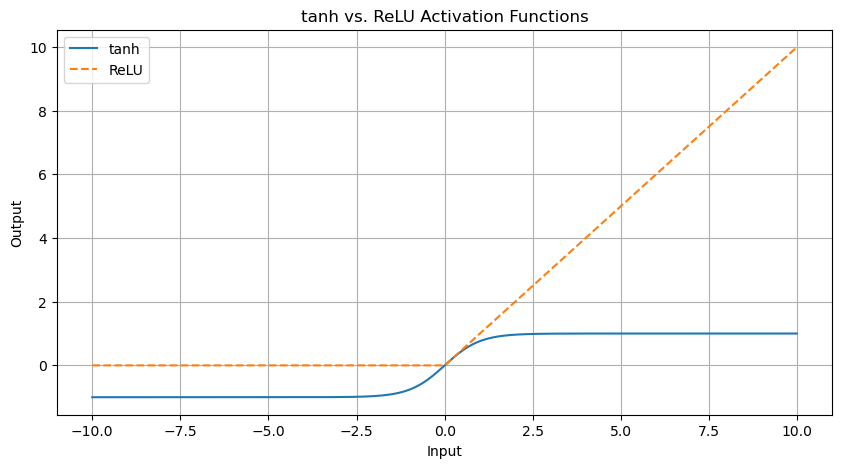

In [7]:
import torch
import matplotlib.pyplot as plt

# Step 1: Generate input data
x = torch.arange(-10, 10, 0.01)

# Step 2: Apply activation functions
y_tanh = torch.tanh(x)
y_relu = torch.relu(x)

# Step 3: Plot the functions
plt.figure(figsize=(10, 5))
plt.plot(x.numpy(), y_tanh.numpy(), label='tanh')
plt.plot(x.numpy(), y_relu.numpy(), label='ReLU', linestyle='--')
plt.title('tanh vs. ReLU Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In summary, the choice between tanh and ReLU depends on the specific requirements of the model and the task at hand. ReLU is often preferred for its computational efficiency and effectiveness in deep networks, while tanh might be chosen for its output range and symmetry in scenarios where these characteristics are beneficial.

Download the sea surface temperature and upper ocean heat content fields for ENSO prediction. If you like, you can add these files to your google drive or local filesystem in the same place as your copy of this notebook, so that you won't have to install gdown and download them in the future whenever you restart this notebook.

In [ ]:
# ! executes shell commands instead of python commands

# library for downloading files from google drive.
!pip install gdown

In [7]:
# enso index data from previous exercises
!gdown https://drive.google.com/uc?id=1FUb-2lcAd0Y1ULjx5jB6UTMNDmGy3vZA

# sea surface temperature and upper ocean heat content
!gdown https://drive.google.com/uc?id=1TUFl4l4iEyIKTY1UnRD3G7fKElNMXjwo
!gdown https://drive.google.com/uc?id=1PkDoopBJdYdiVt_clxnbDfuDGJGM0QSY

Downloading...
From: https://drive.google.com/uc?id=1FUb-2lcAd0Y1ULjx5jB6UTMNDmGy3vZA
To: c:\Users\papas\Downloads\enso_and_pca.npz

  0%|          | 0.00/242k [00:00<?, ?B/s]
100%|██████████| 242k/242k [00:00<00:00, 6.05MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TUFl4l4iEyIKTY1UnRD3G7fKElNMXjwo
To: c:\Users\papas\Downloads\sst.nc

  0%|          | 0.00/8.21M [00:00<?, ?B/s]
  6%|▋         | 524k/8.21M [00:00<00:01, 4.38MB/s]
 13%|█▎        | 1.05M/8.21M [00:00<00:02, 3.55MB/s]
 19%|█▉        | 1.57M/8.21M [00:00<00:02, 3.18MB/s]
 26%|██▌       | 2.10M/8.21M [00:00<00:01, 3.08MB/s]
 32%|███▏      | 2.62M/8.21M [00:00<00:01, 3.03MB/s]
 38%|███▊      | 3.15M/8.21M [00:00<00:01, 3.12MB/s]
 45%|████▍     | 3.67M/8.21M [00:01<00:01, 2.97MB/s]
 51%|█████     | 4.19M/8.21M [00:01<00:01, 3.12MB/s]
 57%|█████▋    | 4.72M/8.21M [00:01<00:01, 2.96MB/s]
 64%|██████▍   | 5.24M/8.21M [00:01<00:00, 3.11MB/s]
 70%|███████   | 5.77M/8.21M [00:01<00:00, 2.98MB/s]
 77%|███████▋  | 6.29M/8

Download the non-PCA data for ENSO prediction

Now load the sea surface temperature data (`sst.nc`) using xarray.

In [28]:
sst_ds = xr.open_dataset('sst.nc',decode_times=False)
print(sst_ds)

<xarray.Dataset>
Dimensions:  (lon: 72, lat: 23, time: 1236)
Coordinates:
  * lon      (lon) float32 0.25 5.25 10.25 15.25 ... 340.2 345.2 350.2 355.2
  * lat      (lat) float32 -54.75 -49.75 -44.75 -39.75 ... 45.25 50.25 55.25
  * time     (time) float64 -1.068e+03 -1.066e+03 -1.066e+03 ... 166.5 167.5
Data variables:
    temp     (time, lat, lon) float32 ...


Load the target ENSO index data.

In [30]:
# load the data
with np.load('enso_and_pca.npz') as data:
    enso_index = data['y']  # 3-month-moving-averaged Nino3.4 index
    t_enso = data['t']  # months since jan. 1 1960 for the center of each 3-month window
t_enso = t_enso[1:]
enso_index = enso_index[1:]

Convert the sea surface temperatures to a tensor with 32 bit floating point data.

In [31]:
ii_lon = np.logical_and(sst_ds.lon > 360 - 170, sst_ds.lon < 360-120)
ii_lat = np.logical_and(sst_ds.lat > -5, sst_ds.lat < 5)

t = sst_ds.time.values[1:-1]  # time axis for window centers enso 3.4 values
regional_temp_34 = sst_ds.temp[:, ii_lat, ii_lon].mean(axis=2).mean(axis=1).values  # spatial average
regional_temp_34 = (regional_temp_34[:-2] + regional_temp_34[1:-1] + regional_temp_34[2:]) / 3.0  # 3 month averages

month = np.remainder(np.round(t - 0.5).astype(int), 12)  # month index, january is zero

enso_34_climatology = np.array([regional_temp_34[month == m].mean() for m in range(12)])
enso_34_climatology_sd = np.array([regional_temp_34[month == m].std() for m in range(12)])
enso_34_anomoly = regional_temp_34.copy()
for m in range(12):
    enso_34_anomoly[month == m] -= enso_34_climatology[m]

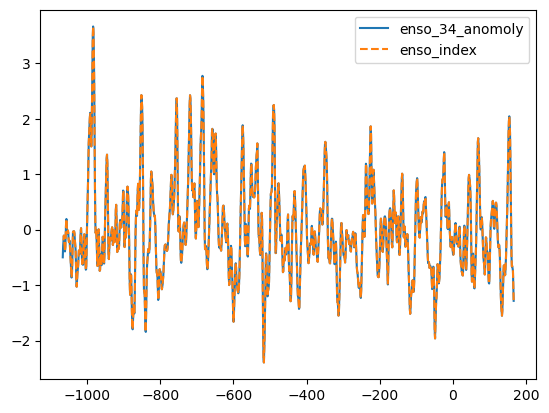

In [32]:
plt.plot(t, enso_34_anomoly,'-', label='enso_34_anomoly')
plt.plot(t_enso, enso_index,'--', label='enso_index')
plt.legend()

The ENSO index is a 3-month moving average, and we'll try to predict it from temperature fields of of the ocean 3 months before the center of the window. That means we have to throw out
* The first few enso_index values, since we don't have ocean temperature fields 3 months earlier
* The last few temperature fields, since we don't have enso_index values 3 months later

Construct PyTorch tensors `x` from the temperature field in `sst` and `y` from the enso_index, so that `x[i]` was measured 3 months earlier than the center of the 3-month window used to compute `y[i]`. Use as much of the data as you can, while dealing with the above-mentioned edge cases. To figure out the timing, compare `t_enso` and `sst.time`. Make sure `x` and `y` have a dtype of 32 bit floating point!

In [34]:
t_enso[1] - sst_ds.time.values[0]

4.0

In [43]:
sst = np.array(sst_ds.temp[:-5])
t_sst = sst_ds.time[:-4]

x = torch.tensor(sst, dtype=torch.float32)
y = torch.tensor(enso_index[1:], dtype=torch.float32)

Normalize `x` and `y` to have a mean of zero and a standard deviation of 1. Don't normalize `x` separately for each location.

In [44]:
mx,my= x.mean(),y.mean()
sx,sy= x.std(),y.std()
x1,y1= (x-mx)/sx, (y-my)/sy

$$\tilde{Y} = (\tilde{E}^p + \tilde{K}^p + \tilde{L}^p)^{1/p}$$

To use 2d convolutions, we need to have a channel dimension for our input tensor, which should be of size `(n_batch, n_channels, n_rows, n_columns)`. Use `reshape` or `unsqueeze` to add a channel axis of size 1 to `x`. It should be in position one, after the batch axis (position 0) but before the spatial dimensions.

Similarly, change `y` to have a second dimension of size 1, so that it has two dimensions total. This way it will match the output coming from out network.


In [45]:
# Assuming x and y are already PyTorch tensors
x1 = x1.unsqueeze(1)  # Adds a channel dimension at position 1
y1 = y1.unsqueeze(1)  # Adds a second dimension of size 1

# Now x has a shape of (n_batch, n_channels, n_rows, n_columns)
# and y has a shape of (n_batch, 1), matching the expected dimensions

Now create a TensorDataset and a dataloader from these tensors, just as we did in last week's exercises. While Ham et al. used a batch size of 400, here we'll use a smaller value of 32.

There's no need to split training and testing data, since the testing data are in another file (`sst_test.nc`).

In [46]:
from torch.utils.data import TensorDataset, DataLoader


dataset = TensorDataset(x1, y1)

# Step 3: Create a DataLoader
batch_size=32
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Now `dataloader` can be used in a training loop to fetch batches of data

Create a class defining your convolutional network.

Add code to the `__init__` method to define the layers, and add code to the `forward` method to use them.
* Start with a convolution with 30 output channels, and 'same' padding so that the image width and height are the same in the input and output. Use filters with a height of 4 and width of 8.
* Then use a `tanh` nonlinearity
* Next use a 2x2 maxpooling layer
* Then another convolution with 30 outputs, filter height 2 and filter width 4.
* Next another `tanh`
* Now another 2x2 maxpooling layer
* A third convolution with 30 outputs, filter height 2 and filter width 4
* Now reshape the output so the batch dimension is unchanged, but all other dimensions are combined into one.
* Now use a fully connected layer with 30 outputs
* Now a `tanh`
* Now a second fully connected layer with 1 output: that's $\hat our y$, which our forward method should return!

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=30, kernel_size=(4, 8), padding='same')
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=30, out_channels=30, kernel_size=(2, 4))
        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=30, out_channels=30, kernel_size=(2, 4))
        # Maxpooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layers
        # The number of input features to the first fully connected layer depends on the size of the input images
        # and the number of maxpooling layers applied. This will be dynamically calculated in the forward method.
        self.fc1 = nn.Linear(in_features=30, out_features=30)  # Placeholder for in_features, will be adjusted
        self.fc2 = nn.Linear(in_features=30, out_features=1)

    def forward(self, x):
        # Apply first convolution, tanh, and maxpooling
        x = self.pool(F.tanh(self.conv1(x)))
        # Apply second convolution, tanh, and maxpooling
        x = self.pool(F.tanh(self.conv2(x)))
        # Apply third convolution
        x = F.tanh(self.conv3(x))
        # Reshape for fully connected layer, preserving batch dimension
        x = x.view(x.size(0), -1)
        # Dynamically adjust the number of input features for the first fully connected layer
        if self.fc1.in_features != x.shape[1]:
            self.fc1 = nn.Linear(in_features=x.shape[1], out_features=30)
        # Apply first fully connected layer and tanh
        x = F.tanh(self.fc1(x))
        # Apply second fully connected layer to get the final output
        x = self.fc2(x)
        return x

Create an instance of your network class.

Pass a single batch of data through the network, and check that everything makes sense.

In [48]:
# Step 1: Create an instance of the network
net = ConvNet()

# Assuming `dataloader` is your DataLoader instance
# Step 2: Fetch a single batch of data
dataiter = iter(dataloader)
images, labels = next(dataiter)
images = images.squeeze(2)
# Step 3: Pass the batch through the network
# Note: If you're using a GPU, you should move the model and data to the GPU here
output = net(images)

# Step 4: Check the output
print("Output shape:", output.shape)
print(f"Expected shape: {batch_size, 1}")

# Check if the output shape makes sense
# Assuming the batch size is 32, the output shape should be [32, 1]
assert output.shape == (32, 1), "Output shape does not match expected shape."

Output shape: torch.Size([32, 1])
Expected shape: (32, 1)


How many free parameters does your network have?

In [51]:
import torch

# Assuming `model` is your PyTorch model
total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)

print(f"Total number of trainable parameters: {total_params}")

total_params_all = sum(p.numel() for p in net.parameters())

print(f"Total number of parameters (trainable + non-trainable): {total_params_all}")

Total number of trainable parameters: 62311
Total number of parameters (trainable + non-trainable): 62311


Write a training loop.

To avoid having to loop over trainable parameters, we'll use the optimizer class. We tell it once which parameters to update and what the learning rate is, then we can simply call `optimizer.step()` after calling `loss.backward()`, and all the parameters will be updated appropriately.

**Important**: For the optimizer to work properly each convolutional or fully connected layer must be an attribute of your `net.object`, for example by calling `self.layer = torch.nn.Conv2d(...)` in your network's `__init__` method. If you want to use a list instead that's ok, but in that case include `self.layers_list = torch.nn.ModuleList(layers_list)` to make sure that the optimizer finds the parameters of these layers.

Train your network over at least 300 epochs with a learning rate of 0.001. Keep track of the loss values and plot them at the end

**Optional**: if you want training to go more quickly, use a GPU instance. Generally you'll get it for 12 hours, and it will disconnect if it goes idle for an hour.
* In the colab menu, go to Runtime -> Change runtime type -> Hardware accelerator -> GPU and restart the colab notebook.
* Use `print(torch.cuda.get_device_name(0))` to figure out what kind of GPU you have
* Define `device = torch.device('cuda:0')`
* Call `net = net.to(device)` and `x = x.to(device)` and `y = y.to(device)`. Create a new Dataset and Dataloader, and start training


Training on cpu
Epoch 1, Loss: 0.0221
Epoch 2, Loss: 0.0049
Epoch 3, Loss: 0.0453
Epoch 4, Loss: 0.0343
Epoch 5, Loss: 0.0182
Epoch 6, Loss: 0.0390
Epoch 7, Loss: 0.0354
Epoch 8, Loss: 0.0367
Epoch 9, Loss: 0.0338
Epoch 10, Loss: 0.0112
Epoch 11, Loss: 0.0264
Epoch 12, Loss: 0.0251
Epoch 13, Loss: 0.0176
Epoch 14, Loss: 0.0103
Epoch 15, Loss: 0.0328
Epoch 16, Loss: 0.0217
Epoch 17, Loss: 0.0377
Epoch 18, Loss: 0.0381
Epoch 19, Loss: 0.0233
Epoch 20, Loss: 0.0169
Epoch 21, Loss: 0.0137
Epoch 22, Loss: 0.0218
Epoch 23, Loss: 0.0247
Epoch 24, Loss: 0.0134
Epoch 25, Loss: 0.0452
Epoch 26, Loss: 0.0183
Epoch 27, Loss: 0.0285
Epoch 28, Loss: 0.0653
Epoch 29, Loss: 0.0201
Epoch 30, Loss: 0.0173
Epoch 31, Loss: 0.0116
Epoch 32, Loss: 0.0261
Epoch 33, Loss: 0.0221
Epoch 34, Loss: 0.0258
Epoch 35, Loss: 0.0226
Epoch 36, Loss: 0.0143
Epoch 37, Loss: 0.0295
Epoch 38, Loss: 0.0178
Epoch 39, Loss: 0.0132
Epoch 40, Loss: 0.0287
Epoch 41, Loss: 0.0238
Epoch 42, Loss: 0.0348
Epoch 43, Loss: 0.0311
Epoc

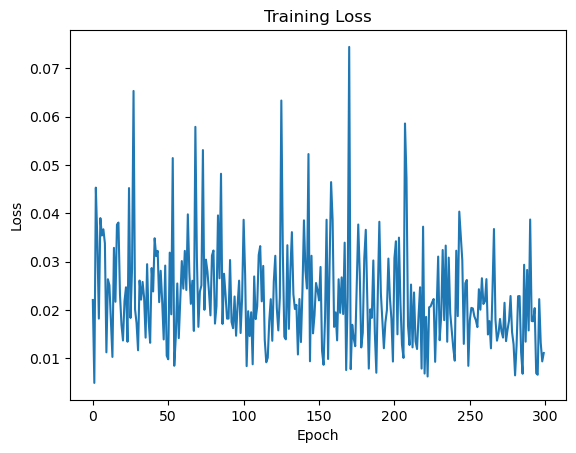

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming ConvolutionalNetwork is your model class
net = ConvNet()

# Check if GPU is available and move the model to GPU if it is
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")
net.to(device)

# Define a loss function and optimizer
criterion = nn.MSELoss()  # Example loss function, adjust according to your problem
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Placeholder for loss values
loss_values = []

# Training loop
for epoch in range(300):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
    # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    
    # Print average loss for each epoch
    epoch_loss = running_loss / len(dataloader)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")
    loss_values.append(epoch_loss)

print('Finished Training')

# Plotting the loss values
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
n_epochs = 300
learning_rate = 0.001  # adjust this if necessary

lossfunc = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch in tqdm(range(n_epochs)):
    for batch_index, batch in enumerate(data_loader):
        # note that each time this loop is run through, the order of the data is randomly permuted!
        x_batch, y_batch = batch
        optimizer.zero_grad()

        #yhat_batch = ...
        #loss = lossfunc( ... )

        loss.backward()
        optimizer.step()  # this will update parameters using torch.no_grad()
        optimzer.zero_grad()

Plot the predictions $\hat y$ against the targets $y$.

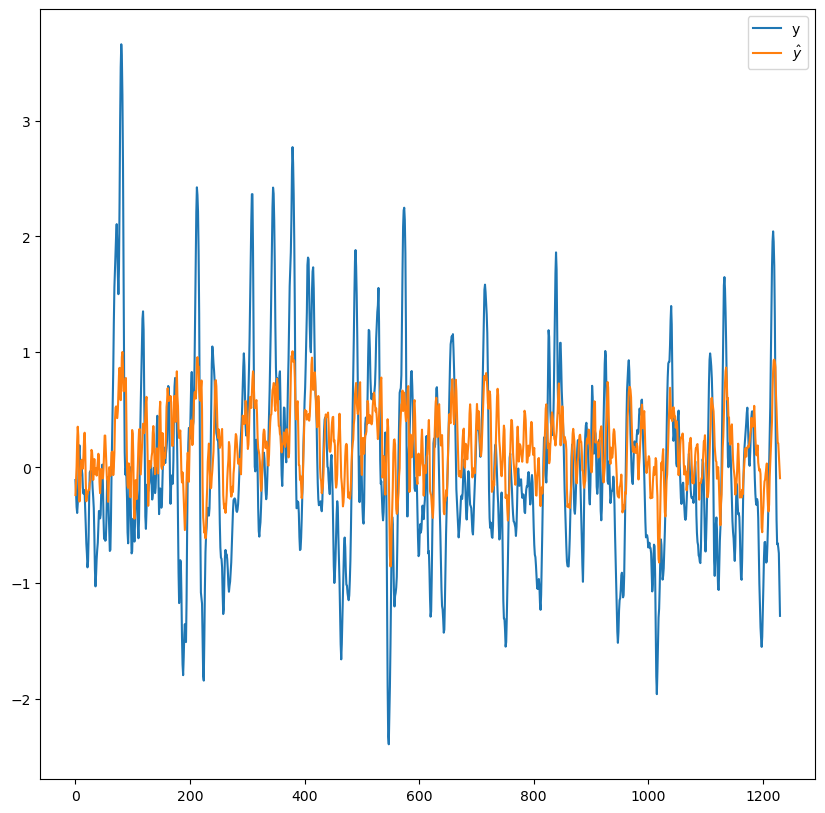

In [75]:
yhat = net(x1)
plt.figure(figsize=(10,10))
plt.plot(y.detach().numpy().reshape(-1), label='y')
plt.plot(yhat.detach().numpy().reshape(-1),label='$\hat y$')
plt.legend()

Calculate the Pearson's correlation between your prediction and the target over the training data.

In [77]:
correlation=np.corrcoef(y.detach().numpy().reshape(-1),yhat.detach().numpy().reshape(-1))

print(f"Pearson's correlation: {correlation}")

Pearson's correlation: [[1.         0.65022348]
 [0.65022348 1.        ]]


Load `hc.nc`, containing heat content of the upper ocean, and use it as a second input channel to the network. Does this improve performance on the training data?

**Optional (+15% max. points)** Include two previous time steps as input for a total of 6 input channels.

In this case, we were able to load all of the training data into memory and store it in pytorch tensors. What if the training data were too big to fit into memory all at once? What could we do then? Propose a potential solution to this problem, and describe in words (or if you like, code) roughly how it would work.